# Gaussian kCCA Proof
Using simulation data from https://arxiv.org/pdf/cs/0609071.pdf

In [1]:
%matplotlib inline
import numpy as np
import sys
sys.path.append("../../..")
from multiview.embed.kcca import KCCA
from multiview.embed.gcca import GCCA

import matplotlib.pyplot as plt
from scipy import linalg, stats
from scipy.stats import pearsonr

#np.random.seed(30)
t = np.random.uniform(-np.pi, np.pi, 80)
e1 = np.random.normal(0, 0.5, (80,2))
e2 = np.random.normal(0, 0.5, (80,2))

In [2]:
x = np.zeros((80,2))
x[:,0] = t
x[:,1] = np.sin(3*t)
x += e1

y = np.zeros((80,2))
y[:,0] = np.exp(t/4)*np.cos(2*t)
y[:,1] = np.exp(t/4)*np.sin(2*t)
y += e2

nSamples=40
train1 = x[:nSamples]
train2 = y[:nSamples]
test1 = x[nSamples:]
test2 = y[nSamples:]

In [20]:
gcca = GCCA()
Xs_latents1 = gcca.fit_transform([train1, train2], n_components=2)
Xs_latents1[0][:,0]

array([ 1.09060067,  2.14218496, -0.89385726, -3.77281798, -0.86806511,
       -0.86806511, -0.86806511,  1.86639282, -0.86806511, -0.61806511,
        2.14218496,  1.86639282,  1.86639282, -0.89385726,  0.45931132,
        2.14218496, -1.11806511, -0.86806511,  1.86639282, -0.89385726,
       -0.86806511, -0.86806511, -0.89385726, -0.89385726,  2.14218496,
       -0.61806511, -0.89385726, -0.61806511, -0.89385726,  2.14218496,
        1.86639282, -0.86806511, -1.14385726, -0.89385726, -0.86806511,
       -0.89385726,  1.86639282,  2.14218496, -0.86806511, -0.89385726])

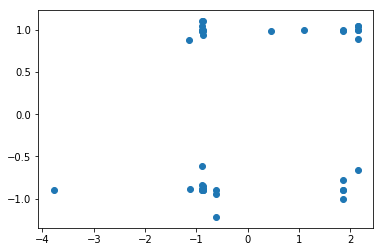

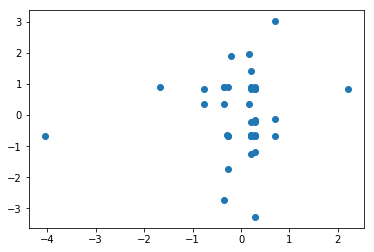

In [21]:
fig = plt.figure()
plt.scatter(Xs_latents1[0][:,0],Xs_latents1[1][:,0])
fig = plt.figure()
plt.scatter(Xs_latents1[0][:,1],Xs_latents1[1][:,1])

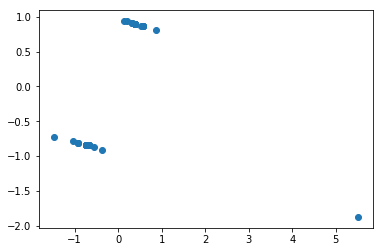

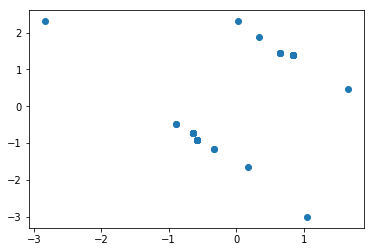

In [12]:
fig = plt.figure()
plt.scatter(Xs_latents1[0][:,0],Xs_latents1[0][:,1])
fig = plt.figure()
plt.scatter(Xs_latents1[1][:,0],Xs_latents1[1][:,1])

# Train model

In [3]:
# Create a gaussian kcca object as an instantiation of the KCCA object class
kcca_gtr = KCCA(ktype ="gaussian", reg = 0.0001, n_components = 2, sigma = 1)

# Use the train() method to find a gaussian projection between the two views.
kcca_gtr.fit_transform([train1, train2])

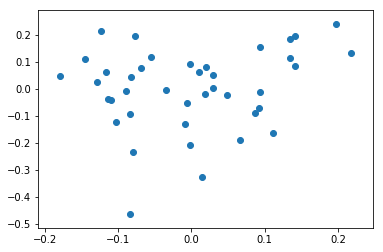

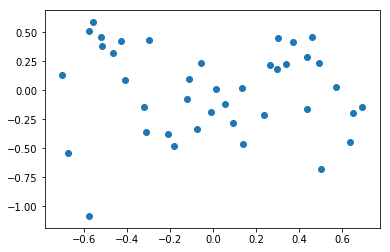

In [4]:
# Plot each view and its two dimensions. Each view should look similar
fig = plt.figure()
plt.scatter(kcca_gtr.components_[0][:,0],kcca_gtr.components_[1][:,0])
fig = plt.figure()
plt.scatter(kcca_gtr.components_[0][:,1],kcca_gtr.components_[1][:,1])

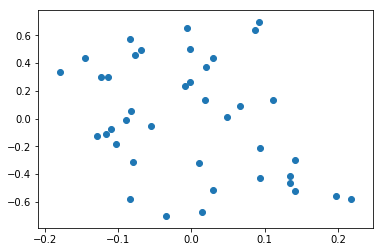

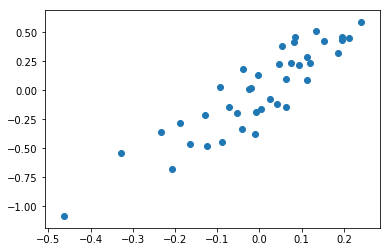

In [5]:
# Plot same dimension across both views. Should be linear
fig = plt.figure()
plt.scatter(kcca_gtr.components_[0][:,0],kcca_gtr.components_[0][:,1])
fig = plt.figure()
plt.scatter(kcca_gtr.components_[1][:,0],kcca_gtr.components_[1][:,1])

In [16]:
corr1, _ = pearsonr(kcca_gtr.components_[0][:,0],kcca_gtr.components_[0][:,1])
corr1

0.8108334458159561

In [17]:
corr2, _ = pearsonr(kcca_gtr.components_[1][:,0],kcca_gtr.components_[1][:,1])
corr2

-0.8978800342687906

# Apply to test data

In [78]:
# Use the weights that the model developed and apply it to the test data
testcomps1= np.dot(test1, kcca_gtr.ws_[0])
testcomps2= np.dot(test2, kcca_gtr.ws_[1])

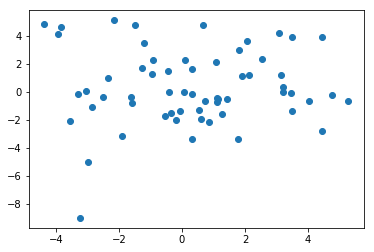

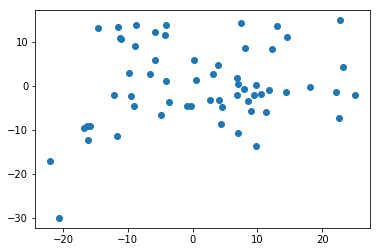

In [79]:
#Plot 1st and 2nd dimension of each view.
fig = plt.figure()
plt.scatter(testcomps1[:,0],testcomps2[:,0])
fig = plt.figure()
plt.scatter(testcomps1[:,1],testcomps2[:,1])

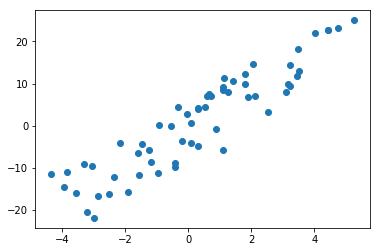

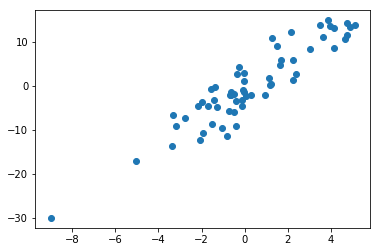

In [80]:
#Plot same dimension of each view. Confirm linear relationship
fig = plt.figure()
plt.scatter(testcomps1[:,0],testcomps1[:,1])
fig = plt.figure()
plt.scatter(testcomps2[:,0],testcomps2[:,1])

In [81]:
corr1, _ = pearsonr(testcomps1[:,0],testcomps1[:,1])
corr1

0.9194866300218385

In [82]:
corr2, _ = pearsonr(testcomps2[:,0],testcomps2[:,1])
corr2

0.9249447996423246

# Combined linear releationship

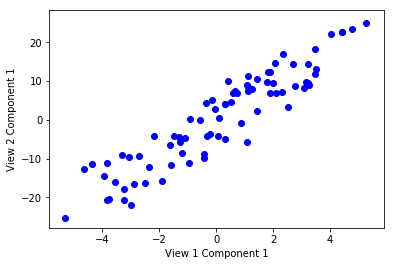

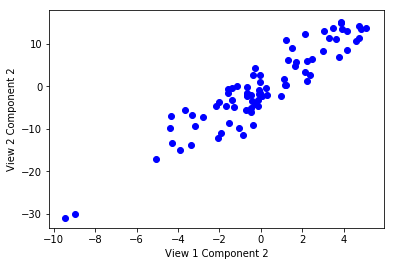

In [53]:
# Plot same dimension across both views. Should be linear
fig = plt.figure()
plt.scatter(kcca_gtr.comps_[0][:,0],kcca_gtr.comps_[0][:,1], color='blue')
plt.scatter(testcomps1[:,0],testcomps1[:,1], color='blue')
plt.xlabel('View 1 Component 1')
plt.ylabel('View 2 Component 1')

fig = plt.figure()
plt.scatter(kcca_gtr.comps_[1][:,0],kcca_gtr.comps_[1][:,1], color='blue')
plt.scatter(testcomps2[:,0],testcomps2[:,1], color='blue')
plt.xlabel('View 1 Component 2')
plt.ylabel('View 2 Component 2')